#### 1-import libs 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2- read dataset 

In [3]:
dataset = pd.read_csv('../data/spam.csv',delimiter=',',encoding='latin-1')


#### 3- explore the dataset

In [4]:
dataset.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [5]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
dataset.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
dataset.duplicated().sum()

np.int64(403)

#### 4- data cleaning

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
### drop columns which contains null values more than %50
null_columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
dataset = dataset.drop(null_columns,axis=1)


In [12]:
dataset.sample()

,v1,v2
5532,ham,happened here while you were adventuring


In [13]:
# drop duplicate rows 
dataset = dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [14]:
## change columns names v1 to target and v2 to msg 
dataset.rename(columns = {'v1':'target','v2':'msg'},inplace=True)

In [15]:
dataset.sample()

,target,msg
1176,ham,"Did he say how fantastic I am by any chance, o..."


In [16]:
dataset.to_csv('../data/preprocessed_dataset.csv',index = False)

#### 4- Data Visualization

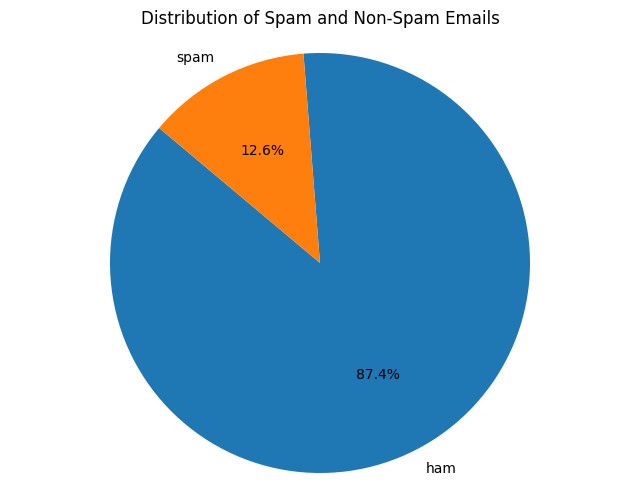

In [17]:
MSG_TYPE = dataset['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(MSG_TYPE, labels=MSG_TYPE.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()

#### 5- Text transformation using different approaches (TFIDF and GloVe)

In [19]:
from helpers import clean_msg

In [20]:
dataset = pd.read_csv('../data/preprocessed_dataset.csv',delimiter=',',encoding='latin-1')

In [21]:
dataset['msg'] = dataset['msg'].apply(clean_msg)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_d

In [22]:
dataset.head()

,target,msg
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [23]:
x = dataset['msg']
y = dataset['target']

##### 5.1 TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5572)
x_tfidf  = tfidf_vectorizer.fit_transform(x).toarray()

In [25]:
print(len(x_tfidf[0]))

5572


In [26]:
from sklearn.model_selection import train_test_split
x_tfidf_train,x_tfidf_test,y_tfidf_train,y_tfidf_test = train_test_split(x_tfidf,y,test_size = 0.2, random_state= 42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_tfidf_train,y_tfidf_train)


TypeError: ForestClassifier.predict() takes 2 positional arguments but 3 were given

In [33]:
y_tfidf_predict = classifier.predict(x_tfidf_test)

In [50]:
from sklearn.metrics import accuracy_score,f1_score

In [ ]:

accuracy = accuracy_score(y_tfidf_test, y_tfidf_predict)
print("Accuracy:", accuracy)


Accuracy: 0.9709864603481625


In [40]:
import pickle

# Save the model
with open("../models/spam_model.pkl", "wb") as model_file:
    pickle.dump(classifier, model_file)

# Save the TF-IDF vectorizer
with open("../models/tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [47]:
# Load the model
with open("../models/spam_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Load the TF-IDF vectorizer
with open("../models/tfidf_vectorizer.pkl", "rb") as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)


In [48]:

# Example: Predict new SMS
test_messages = [
    "Exclusive Offer! Buy 1 Get 1 Free on all electronics. Limited time only!",  # Spam
    "Hi Mom, I'll be home late today. Don't wait up!",  # Not Spam
    "Claim your free crypto tokens now! Visit www.scamcrypto.com",  # Spam
    "Bank alert: Your transaction of $5000 has been processed successfully.",  # Not Spam
    "Congratulations! You've won a free iPhone! Click here to claim now.",  # Spam
    "Hey, are we still meeting for lunch today?",  # Not Spam
    "URGENT! Your account has been compromised. Click the link to secure it.",  # Spam
    "Your order has been shipped. Track it here: www.tracking.com",  # Not Spam
    "WINNER! You have been selected for a $500 gift card. Reply YES to claim.",  # Spam
    "Reminder: Your doctor's appointment is scheduled for tomorrow at 3 PM.",  # Not Spam
    "You have received a new voicemail. Click here to listen.",  # Spam
    "Hey John, can you send me the project files?",  # Not Spam
]
# Transform test messages using the trained vectorizer
test_messages_tfidf = loaded_vectorizer.transform(test_messages)

# Make predictions
predictions = loaded_model.predict(test_messages_tfidf)

# Print results
for msg, pred in zip(test_messages, predictions):
    print(pred)


ham
ham
ham
ham
spam
ham
spam
ham
spam
ham
ham
ham
